In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-datasets-for-all-indian-states-2010-2017/Crops_data.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/crop-datasets-for-all-indian-states-2010-2017/Crops_data.csv')

In [3]:
data.head(10)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,2010,14,Chhattisgarh,Durg,777.92,1319.18,1695.77,46.12,45.87,...,256.96,0.00,0.00,0.00,2.00,32.29,34.30,0.11,0.49,0.15
1,1,2011,14,Chhattisgarh,Durg,806.55,1416.48,1756.23,44.98,50.19,...,506.02,0.08,0.02,250.00,0.00,0.00,0.00,0.12,0.54,0.00
2,1,2012,14,Chhattisgarh,Durg,807.07,1534.22,1900.97,43.87,47.69,...,252.98,0.13,0.02,153.85,1.99,33.70,35.69,0.12,0.54,1.32
3,1,2013,14,Chhattisgarh,Durg,819.44,1296.24,1581.86,41.54,43.33,...,237.45,0.05,0.01,200.00,1.90,32.83,34.74,0.11,0.50,0.77
4,1,2014,14,Chhattisgarh,Durg,834.87,1444.24,1729.89,44.25,50.96,...,602.17,0.05,0.02,400.00,0.00,0.00,0.00,0.33,0.51,0.00
5,1,2015,14,Chhattisgarh,Durg,817.68,880.60,1076.95,48.72,54.60,...,228.49,0.05,0.01,200.00,0.00,0.00,0.00,0.16,0.46,1.83
6,1,2016,14,Chhattisgarh,Durg,858.91,1791.66,2085.96,48.94,61.84,...,389.38,0.06,0.02,317.81,2.14,39.44,41.59,0.05,0.37,0.05
7,1,2017,14,Chhattisgarh,Durg,841.13,983.21,1168.92,43.50,50.19,...,181.06,0.45,0.13,297.85,0.00,0.00,0.00,0.08,0.19,0.00
8,2,2010,14,Chhattisgarh,Bastar,621.89,1184.98,1905.45,1.60,3.20,...,117.65,0.00,0.00,0.00,2.66,14.37,17.02,0.28,0.14,0.00
9,2,2011,14,Chhattisgarh,Bastar,627.73,772.88,1231.23,1.33,2.49,...,629.63,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.29,0.00


In [4]:
data.tail(10)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
2474,916,2016,15,Jharkhand,Ranchi,550.38,1195.51,2172.16,22.78,48.17,...,0.0,0.0,0.0,0.0,3.66,55.53,59.20,17.41,1.43,0.0
2475,916,2017,15,Jharkhand,Ranchi,556.33,1124.50,2021.30,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
2476,917,2010,15,Jharkhand,Singhbhum,187.56,111.26,593.20,0.52,0.34,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.17,0.01,0.0
2477,917,2011,15,Jharkhand,Singhbhum,253.68,485.46,1913.67,0.71,0.83,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.27,0.01,0.0
2478,917,2012,15,Jharkhand,Singhbhum,263.85,517.22,1960.28,1.32,1.63,...,4000.0,0.0,0.0,0.0,0.01,8.54,8.54,0.65,0.06,0.0
2479,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.0,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.0
2480,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.0,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.0
2481,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.0,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.0
2482,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.0,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.0
2483,917,2017,15,Jharkhand,Singhbhum,386.91,669.97,1731.62,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    2484 non-null   int64  
 1   Year                                         2484 non-null   int64  
 2   State Code                                   2484 non-null   int64  
 3   State Name                                   2484 non-null   object 
 4   Dist Name                                    2484 non-null   object 
 5   RICE AREA (1000 ha)                          2484 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  2484 non-null   float64
 7   RICE YIELD (Kg per ha)                       2484 non-null   float64
 8   WHEAT AREA (1000 ha)                         2484 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 2484 non-null   float64
 10  

In [6]:
# check missing values

missing_values = data.isnull().sum()

In [7]:
missing_values

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [8]:
# check duplicates 

duplicates_rows = data[data.duplicated()]

In [9]:
duplicates_rows

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)


No Nan Or Duplicates Values

In [10]:
data.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,...,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,270.787440,2013.497987,9.579710,136.178760,343.644275,2080.995036,97.725334,320.235576,2122.398023,7.664654,...,4990.710370,38.805564,15.990358,183.548305,9.660862,14.777689,23.635874,4.739316,1.758941,20.382190
std,279.103876,2.292275,4.993319,165.873301,450.543743,1122.429915,122.065775,511.080609,1358.602497,19.644234,...,3545.974487,97.019304,43.040833,297.351559,17.558463,24.605025,34.156832,12.381880,6.127979,90.339773
min,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,2011.000000,6.000000,8.900000,15.322500,1355.445000,0.965000,1.465000,1200.000000,0.000000,...,1055.792500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,156.000000,2013.000000,10.000000,79.675000,178.145000,2178.335000,48.970000,90.635000,2075.610000,0.190000,...,5734.975000,0.000000,0.000000,0.000000,0.935000,5.565000,9.530000,0.420000,0.230000,0.150000
75%,242.000000,2015.250000,12.000000,207.575000,496.267500,2747.137500,162.557500,496.132500,3127.477500,4.202500,...,7338.447500,14.647500,4.707500,335.860000,10.935000,17.460000,31.422500,4.185000,1.050000,7.542500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,175.000000,...,22062.300000,800.890000,376.610000,2857.740000,117.080000,191.830000,240.990000,111.610000,131.350000,1162.660000


# Follow this questions : 

* Analyzing crop production dynamics and trends over time

* Identifying key drivers of agricultural productivity at the state level

* Assessing the impact of climatic factors, policy interventions, and technological advancements on crop yields

* Supporting evidence-based decision-making in agricultural planning, resource allocation, and policy formulation

* Conducting research on crop diversification strategies, sustainable agriculture practices, and food security initiatives

In [11]:
data.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

# Analyzing crop production dynamics and trends over time using time series 

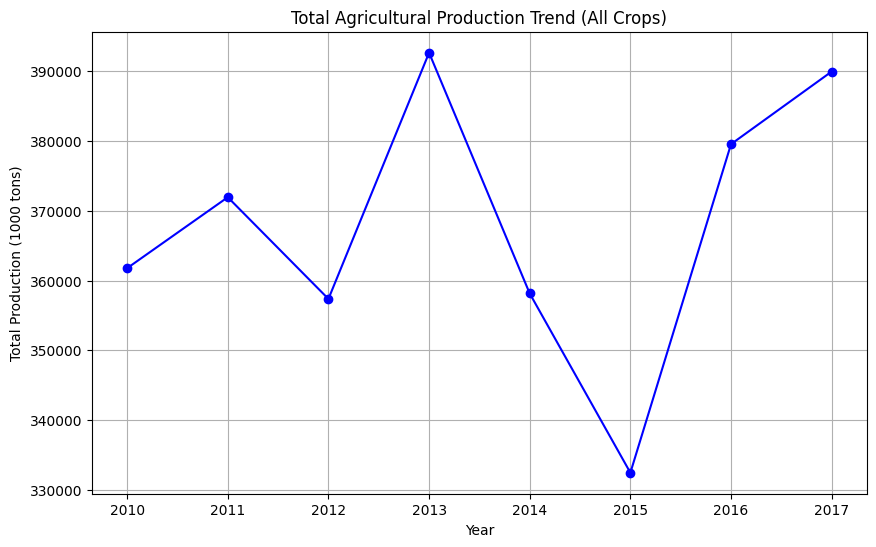

In [12]:
# Calculate total agricultural production for each year

total_production_columns = [col for col in data.columns if 'PRODUCTION (1000 tons)' in col]
data['Total Production (1000 tons)'] = data[total_production_columns].sum(axis=1)

# Group by year and sum up total production

total_production_by_year = data.groupby('Year')['Total Production (1000 tons)'].sum().reset_index()

# Plot the total agricultural production trend over the years

plt.figure(figsize=(10, 6))
plt.plot(total_production_by_year['Year'], total_production_by_year['Total Production (1000 tons)'], marker='o', linestyle='-', color='b')
plt.title('Total Agricultural Production Trend (All Crops)')
plt.xlabel('Year')
plt.ylabel('Total Production (1000 tons)')
plt.grid(True)
plt.show()

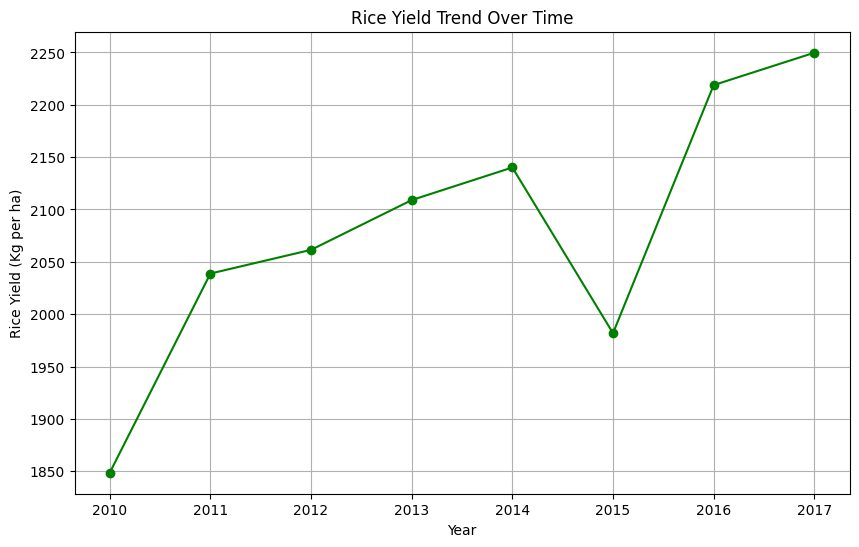

In [13]:
# Calculate the rice yield trend over the years
rice_yield_by_year = data.groupby('Year')['RICE YIELD (Kg per ha)'].mean().reset_index()

# Plot the rice yield trend over the years
plt.figure(figsize=(10, 6))
plt.plot(rice_yield_by_year['Year'], rice_yield_by_year['RICE YIELD (Kg per ha)'], marker='o', linestyle='-', color='g')
plt.title('Rice Yield Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Rice Yield (Kg per ha)')
plt.grid(True)
plt.show()

# Identifying key drivers of agricultural productivity at the state level

In [14]:
data.groupby('State Name').agg({'Total Production (1000 tons)': 'sum', 'RICE YIELD (Kg per ha)': 'mean', 'WHEAT YIELD (Kg per ha)': 'mean', 'MAIZE YIELD (Kg per ha)': 'mean', 'SUGARCANE YIELD (Kg per ha)': 'mean'}).reset_index().sort_values(by='Total Production (1000 tons)', ascending=False)

,State Name,Total Production (1000 tons),RICE YIELD (Kg per ha),WHEAT YIELD (Kg per ha),MAIZE YIELD (Kg per ha),SUGARCANE YIELD (Kg per ha)
17,Uttar Pradesh,526367.19,2317.300625,3106.906793,1697.745625,5911.126467
10,Madhya Pradesh,336545.80,1435.753311,2767.604088,1843.785068,2106.049122
14,Rajasthan,256874.28,1072.703894,2972.057644,1355.557692,4657.483029
11,Maharashtra,254814.36,1090.996814,1357.949265,1910.509951,6219.926275
13,Punjab,239858.41,3924.062386,4723.062045,3172.783636,6860.024886
5,Haryana,157574.30,2940.456429,4538.330714,1326.317679,5271.802500
4,Gujarat,155112.67,1243.111806,2899.303264,1441.192222,4155.279583
8,Karnataka,154460.08,2610.740526,484.312039,3194.734539,8153.750592
19,West Bengal,146777.22,2766.663417,2426.654583,3031.332333,8357.898333
2,Bihar,138999.69,2196.140227,2570.399659,3658.762955,5012.098295


# Assessing the impact of climatic factors, policy interventions, and technological advancements on crop yields

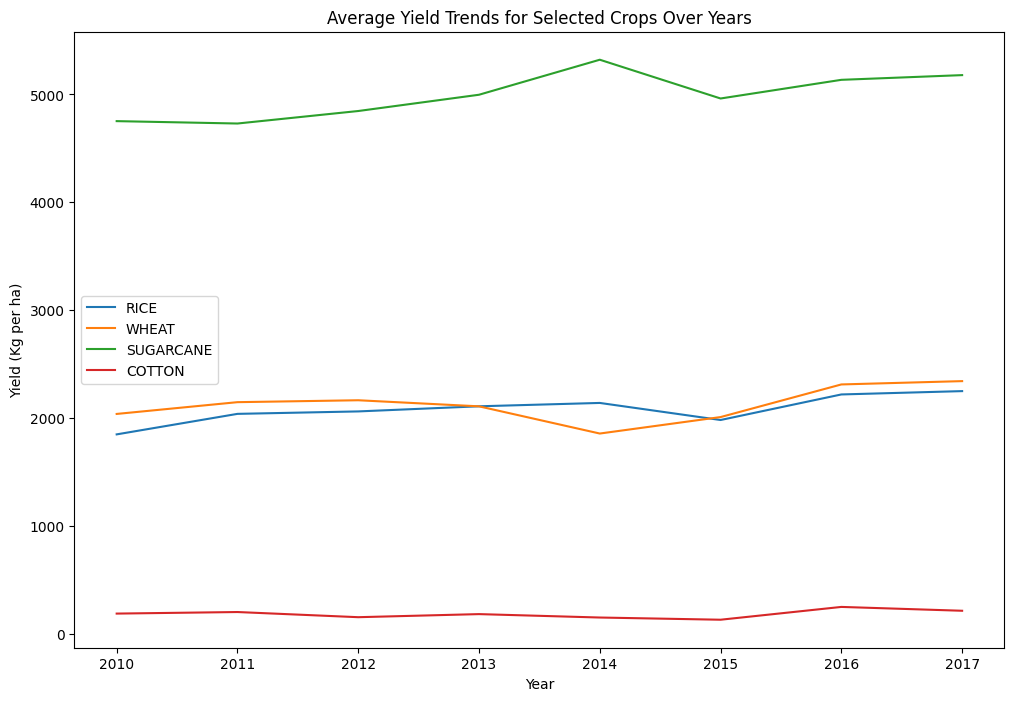

In [15]:
# Calculate the average yield trends for selected crops over the years
crops_to_analyze = ['RICE', 'WHEAT', 'SUGARCANE', 'COTTON']
yield_trends = {}

for crop in crops_to_analyze:
    yield_trends[crop] = data.groupby('Year')[f'{crop} YIELD (Kg per ha)'].mean().reset_index()

# Plotting the yield trends
fig, ax = plt.subplots(figsize=(12, 8))

for crop, df in yield_trends.items():
    ax.plot(df['Year'], df[f'{crop} YIELD (Kg per ha)'], label=crop)

ax.set_xlabel('Year')
ax.set_ylabel('Yield (Kg per ha)')
ax.set_title('Average Yield Trends for Selected Crops Over Years')
ax.legend()
plt.show()

# Supporting evidence-based decision-making in agricultural planning, resource allocation, and policy formulation

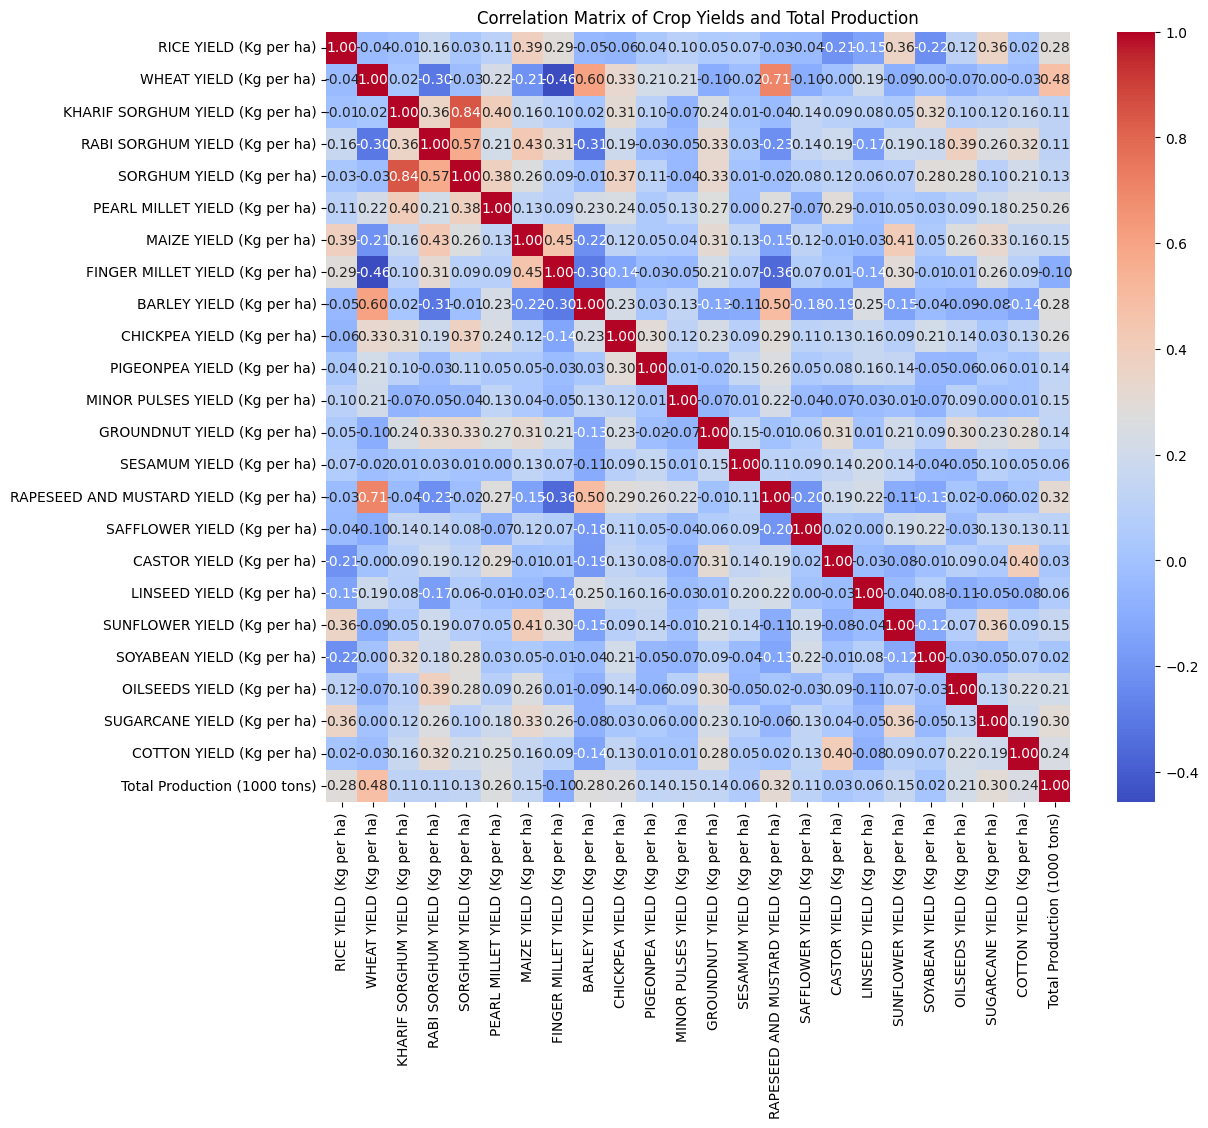

In [16]:
# Calculate the correlation matrix to identify relationships between yields of different crops and total production

correlation_matrix = data[[col for col in data.columns if 'YIELD' in col or col == 'Total Production (1000 tons)']].corr()


# Plot the correlation matrix as a heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Crop Yields and Total Production')
plt.show()

# Conducting research on crop diversification strategies, sustainable agriculture practices, and food security initiatives

/tmp/ipykernel_33/712710830.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_production_data.replace(0, np.nan, inplace=True)


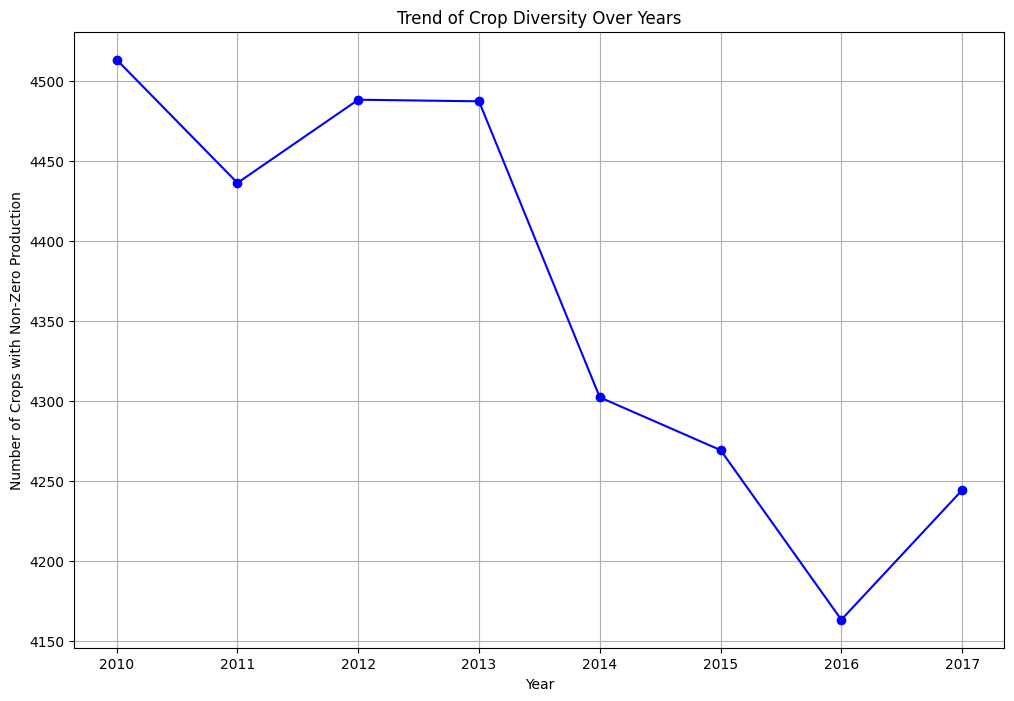

In [18]:
# Calculate the diversity of crops grown each year by counting the number of crops with non-zero production

# Create a list of production columns for all crops
crop_production_columns = [col for col in data.columns if 'PRODUCTION (1000 tons)' in col]

# Add a year column to the crop production data for grouping
crop_production_data = data[['Year'] + crop_production_columns]

# Replace zeros with NaN for accurate non-zero count
crop_production_data.replace(0, np.nan, inplace=True)

# Calculate the number of crops with non-zero production each year
crop_diversity_by_year = crop_production_data.groupby('Year').count()
crop_diversity_by_year['Total Crops'] = crop_diversity_by_year.sum(axis=1)

# Plot the trend of crop diversity over the years
plt.figure(figsize=(12, 8))
plt.plot(crop_diversity_by_year.index, crop_diversity_by_year['Total Crops'], marker='o', linestyle='-', color='b')
plt.title('Trend of Crop Diversity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crops with Non-Zero Production')
plt.grid(True)
plt.show()